#AI Solution for the Garbage detetion

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
from google.colab import drive
from google.colab import files

#MOUNT GOOGLE DRIVE

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#DATASET PATH

In [ ]:
dataset_path = "/content/drive/MyDrive/TrashType_Image_Dataset"
if not os.path.isdir(dataset_path):
    raise FileNotFoundError(f"Folder not found: {dataset_path}")

print("Dataset folder:", dataset_path)
print("Class folders:", [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))])

Dataset folder: /content/drive/MyDrive/TrashType_Image_Dataset
Class folders: ['metal', 'trash', 'plastic', 'paper', 'glass', 'cardboard']


#PARAMETERS

In [ ]:
image_height = 224
image_width = 224
batch_size = 32
validation_split = 0.2
random_seed = 42
epochs = 10

#LOAD DATASETS

In [ ]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=validation_split,
    subset="training",
    seed=random_seed,
    image_size=(image_height, image_width),
    batch_size=batch_size
    )

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=validation_split,
    subset="validation",
    seed=random_seed,
    image_size=(image_height, image_width),
    batch_size=batch_size
)

class_names = train_dataset.class_names
num_classes = len(class_names)
print("Detected classes:", class_names)

Found 2529 files belonging to 6 classes.
Using 2024 files for training.
Found 2529 files belonging to 6 classes.
Using 505 files for validation.
Detected classes: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


#PERFORMANCE

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

#3-Layer CNN Model

In [ ]:
cnn_model = models.Sequential([
    layers.Rescaling(1.0 / 255, input_shape=(image_height, image_width, 3)),

    layers.Conv2D(32, (3, 3), activation="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation="softmax")
])

cnn_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,734 (42.61 MB)

 Trainable params: 11,169,734 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

#Model Training

In [ ]:
epochs = 15
history = cnn_model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs
)

Epoch 1/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 19s 122ms/step - accuracy: 0.2705 - loss: 1.7704 - val_accuracy: 0.3980 - val_loss: 1.4373
Epoch 2/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.4662 - loss: 1.3335 - val_accuracy: 0.5465 - val_loss: 1.2085
Epoch 3/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.5724 - loss: 1.1229 - val_accuracy: 0.5723 - val_loss: 1.1399
Epoch 4/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.6351 - loss: 1.0106 - val_accuracy: 0.6059 - val_loss: 1.0899
Epoch 5/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.7005 - loss: 0.8319 - val_accuracy: 0.5802 - val_loss: 1.1776
Epoch 6/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.7241 - loss: 0.7771 - val_accuracy: 0.6475 - val_loss: 1.0712
Epoch 7/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.8011 - loss: 0.5452 - val_accuracy: 0.6416 - val_loss: 1.0569
Epoch 8/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.8547 - loss: 0.4547 - val_accuracy: 0.6416 -

#Save Model

In [ ]:
model_path = "/content/garbage_cnn_model.h5"
cnn_model.save(model_path)
print("Model saved at:", model_path)

Model saved at: /content/garbage_cnn_model.h5


In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True
)

history = cnn_model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=30,
    callbacks=[early_stop]
)


Epoch 1/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.9412 - loss: 0.1694 - val_accuracy: 0.6297 - val_loss: 1.7751
Epoch 2/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.9693 - loss: 0.1029 - val_accuracy: 0.6337 - val_loss: 2.2482
Epoch 3/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.9708 - loss: 0.0902 - val_accuracy: 0.6178 - val_loss: 2.1148
Epoch 4/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.9610 - loss: 0.1091 - val_accuracy: 0.6257 - val_loss: 2.0973


# TRAINING vs VALIDATION PLOTS

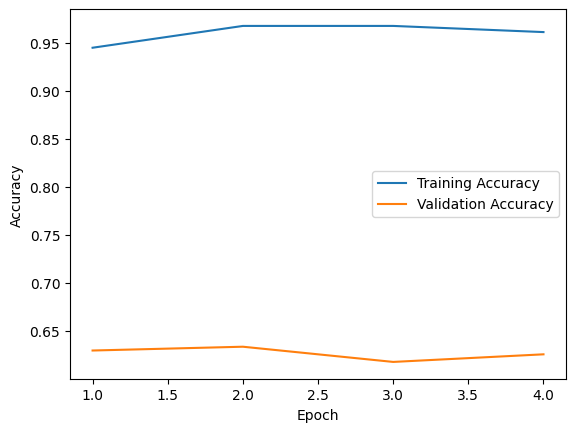

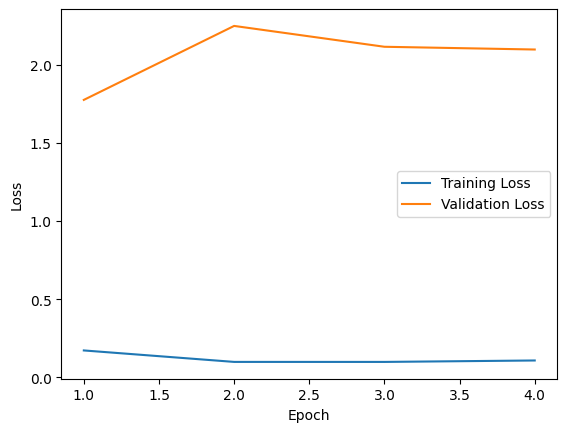

In [ ]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs_range = range(1, len(accuracy) + 1)

plt.figure()
plt.plot(epochs_range, accuracy, label="Training Accuracy")
plt.plot(epochs_range, val_accuracy, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


#Prediction

In [29]:
# -------- 10) QUICK TEST (upload image) --------
# Upload image from local system
uploaded = files.upload()

# Get uploaded image path
uploaded_image_path = list(uploaded.keys())[0]

# Load and preprocess image
test_image = image.load_img(
    uploaded_image_path,
    target_size=(image_height, image_width)
)

test_image_array = image.img_to_array(test_image)
test_image_array = test_image_array / 255.0
test_image_array = np.expand_dims(test_image_array, axis=0)

# Predict
prediction = cnn_model.predict(test_image_array)
predicted_class_index = np.argmax(prediction)
predicted_class_name = class_names[predicted_class_index]

print("Predicted Garbage Category:", predicted_class_name)


KeyboardInterrupt: 